##################################
# Feature Engineering for Diabetes
##################################
### EN ###

# Problem: Developing a Machine Learning Model to Predict Diabetes Based on Features

# The dataset is part of a large dataset maintained by the National Institute of Diabetes and Digestive and Kidney Diseases in the United States. 
# It is used for diabetes research on Pima Indian women aged 21 and older living in Phoenix, the 5th largest city in Arizona, USA. The dataset consists of 768 observations and 8 numerical independent variables. 
# The target variable is indicated as "outcome," where 1 denotes a positive diabetes test result, and 0 denotes a negative result.

# Pregnancies: Number of pregnancies
# Glucose: Glucose level
# loodPressure: Blood pressure (Diastolic)
# SkinThickness: Skin thickness
# Insulin: Insulin level
# BMI: Body Mass Index
# DiabetesPedigreeFunction: A function that calculates the likelihood of diabetes based on family history
# Age: Age (years)
# Outcome: Information about whether the person has diabetes or not. 1 indicates having the disease, and 0 indicates not having the disease.

### TR ###
# Problem : Özellikleri belirtildiğinde kişilerin diyabet hastası olup olmadıklarını tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi.

# Veri seti ABD'deki Ulusal Diyabet-Sindirim-Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin parçasıdır.
# ABD'deki Arizona Eyaleti'nin en büyük 5. şehri olan Phoenix şehrinde yaşayan 21 yaş ve üzerinde olan Pima Indian kadınları üzerinde yapılan diyabet araştırması için kullanılan verilerdir. 768 gözlem ve 8 sayısal bağımsız değişkenden oluşmaktadır.
# Hedef değişken "outcome" olarak belirtilmiş olup; 1 diyabet test sonucunun pozitif oluşunu, 0 ise negatif oluşunu belirtmektedir.

# Pregnancies: Hamilelik sayısı
# Glucose: Glikoz
# BloodPressure: Kan basıncı (Diastolic(Küçük Tansiyon))
# SkinThickness: Cilt Kalınlığı
# Insulin: İnsülin.
# BMI: Beden kitle indeksi.
# DiabetesPedigreeFunction: Soyumuzdaki kişilere göre diyabet olma ihtimalimizi hesaplayan bir fonksiyon.
# Age: Yaş (yıl)
# Outcome: Kişinin diyabet olup olmadığı bilgisi. Hastalığa sahip (1) ya da değil (0)



In [3]:
# Necessary Libraries and Functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df_ = pd.read_csv("diabetes.csv")
df=df_.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [5]:

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0 33.600   
1            1       85             66             29        0 26.600   
2            8      183             64              0        0 23.300   
3            1       89             66             23       94 28.100   
4            0      137             40             35      168 43.100   

   DiabetesPedigreeFunction  Age  Outcome  
0                    

In [6]:

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    This function returns the names of categorical, numerical, and cardinal categorical variables in the dataset.
    Note: Numerical variables that appear to be categorical are included in the categorical variables.

    Parameters
    ------
        dataframe: dataframe
            The dataframe from which variable names are to be extracted
        cat_th: int, optional
            Class threshold value for numerical variables that are actually categorical
        car_th: int, optional
            Class threshold value for categorical variables that are actually cardinal

    Returns
    ------
        cat_cols: list
            List of categorical variables
        num_cols: list
            List of numerical variables
        cat_but_car: list
            List of categorical-looking cardinal variables

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is included in cat_cols.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [8]:
##################################
# ANALYSIS OF CATEGORICAL VARIABLES
##################################

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

cat_summary(df, "Outcome")

   Outcome  Ratio
0      500 65.104
1      268 34.896
##########################################


count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


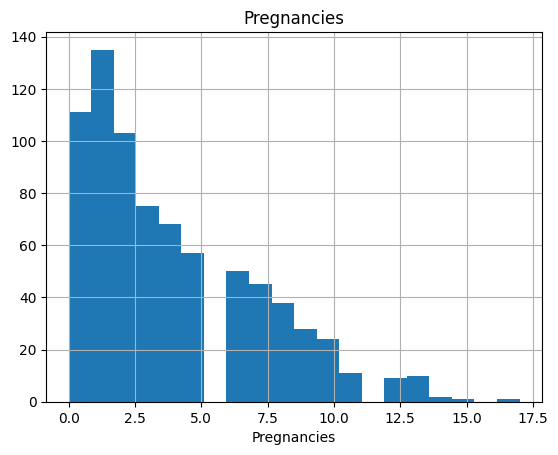

count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


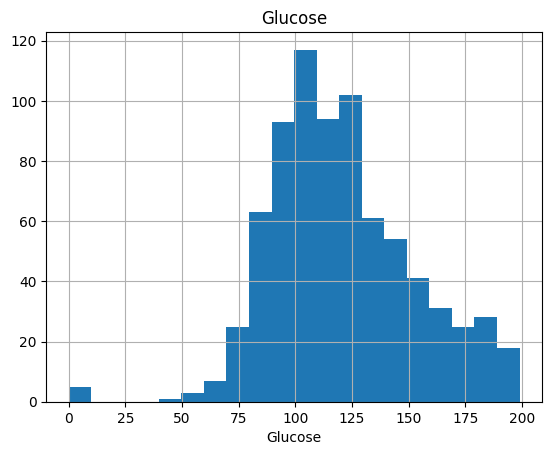

count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


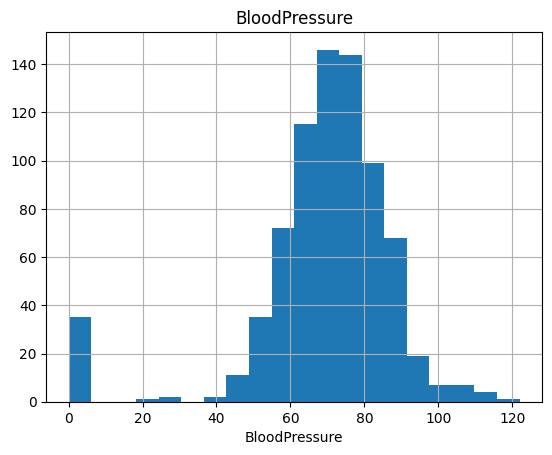

count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


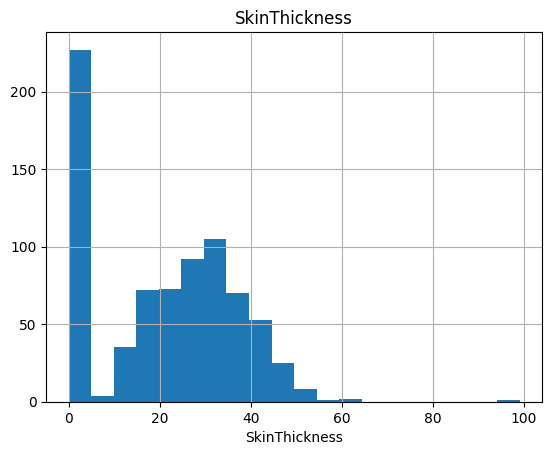

count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


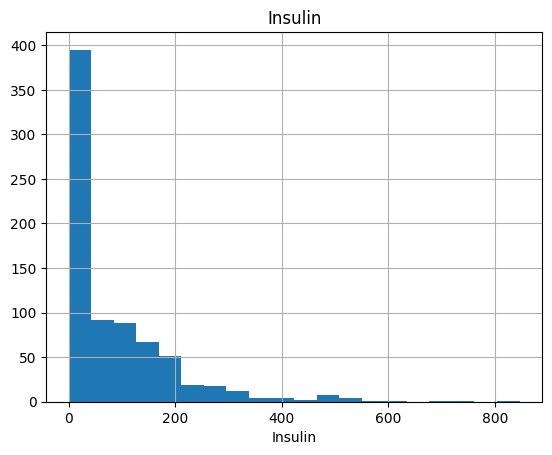

count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


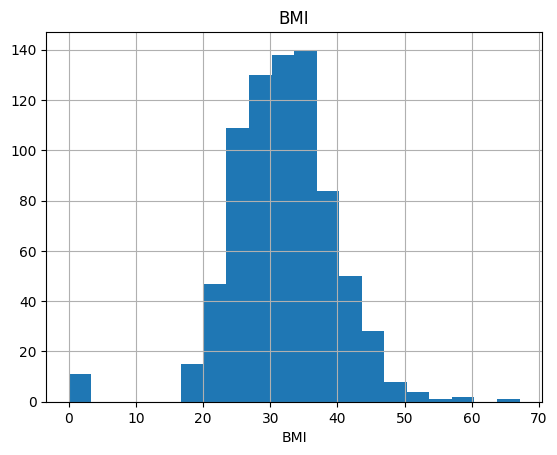

count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


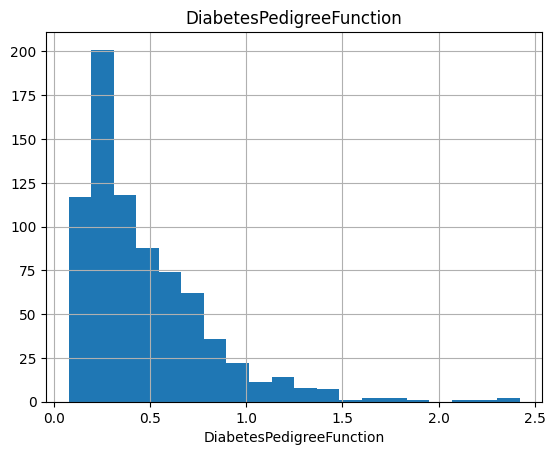

count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


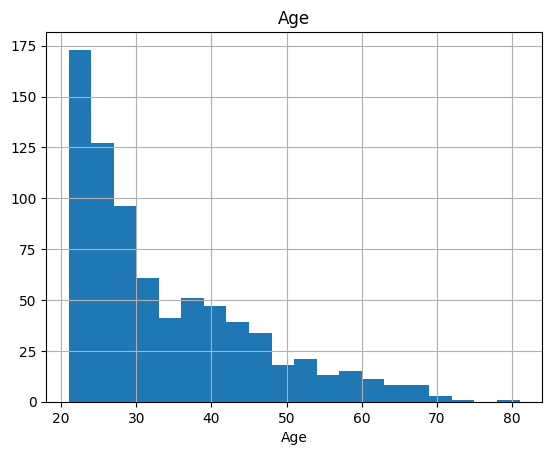

In [9]:
##################################
# ANALYSIS OF NUMERICAL VARIABLES
##################################

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

In [10]:
##################################
# ANALYSIS OF NUMERICAL VARIABLES BY TARGET
##################################

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0              3.298
1              4.866


         Glucose
Outcome         
0        109.980
1        141.257


         BloodPressure
Outcome               
0               68.184
1               70.825


         SkinThickness
Outcome               
0               19.664
1               22.164


         Insulin
Outcome         
0         68.792
1        100.336


           BMI
Outcome       
0       30.304
1       35.143


         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550


           Age
Outcome       
0       31.190
1       37.067




In [11]:

def outlier_thresholds(dataframe, col_name, q1=0.15, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df, "Pregnancies")


(-9.5, 18.5)

In [12]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age False


Pregnancies


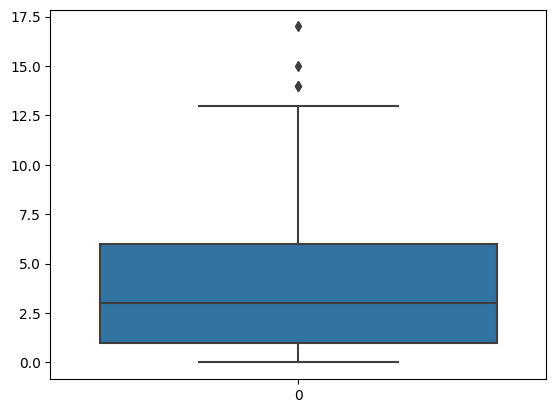

Glucose


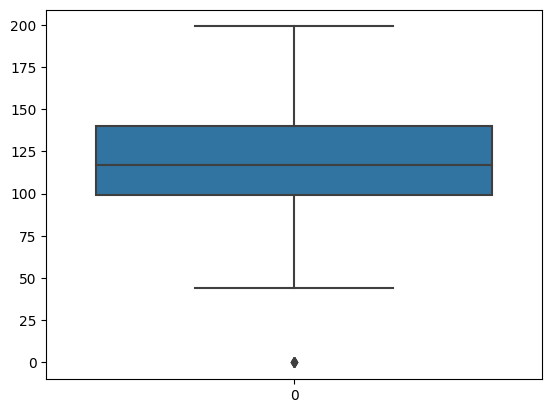

BloodPressure


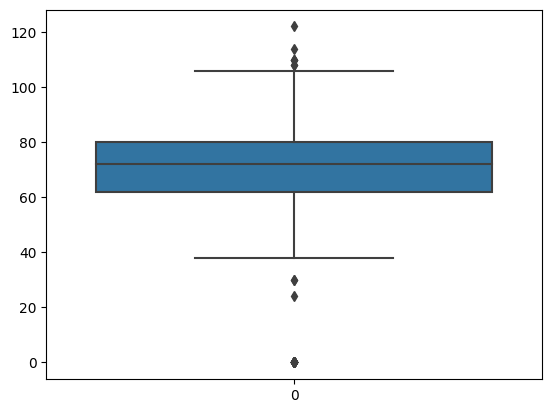

SkinThickness


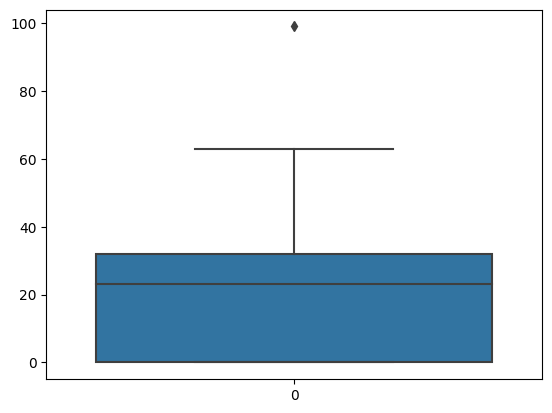

Insulin


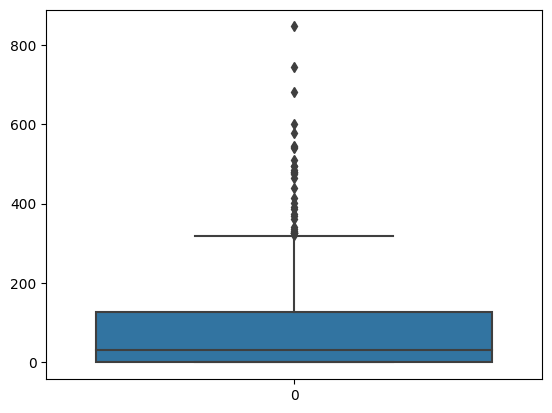

BMI


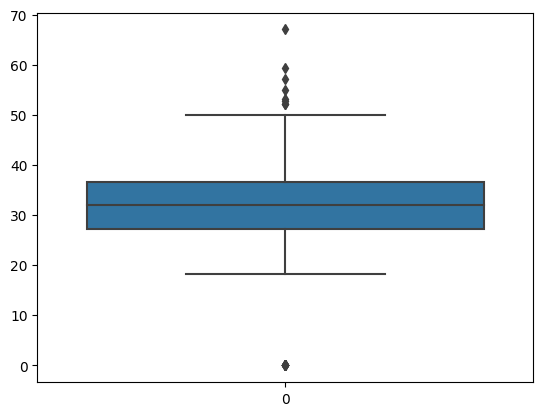

DiabetesPedigreeFunction


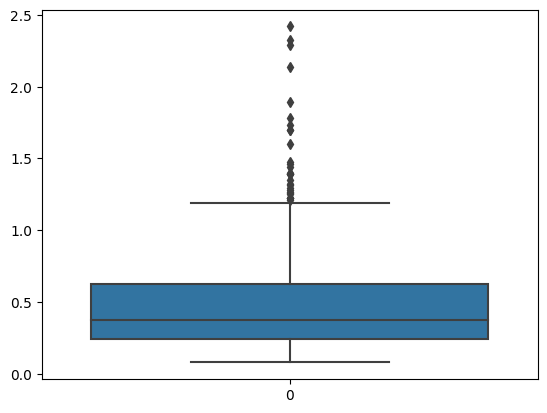

Age


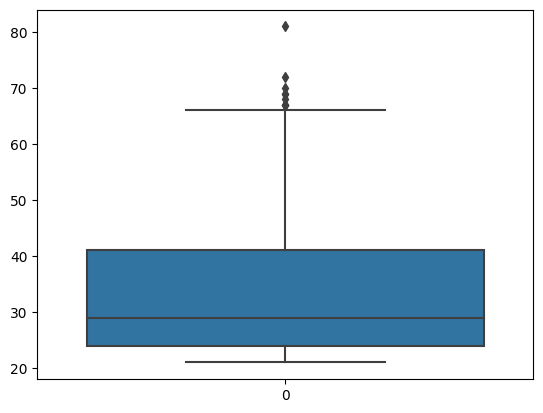

In [13]:
def box_plot_analyses(df, col):
    sns.boxplot(df[col])
    plt.show()

for col in num_cols:
    print(col)
    box_plot_analyses(df,col)

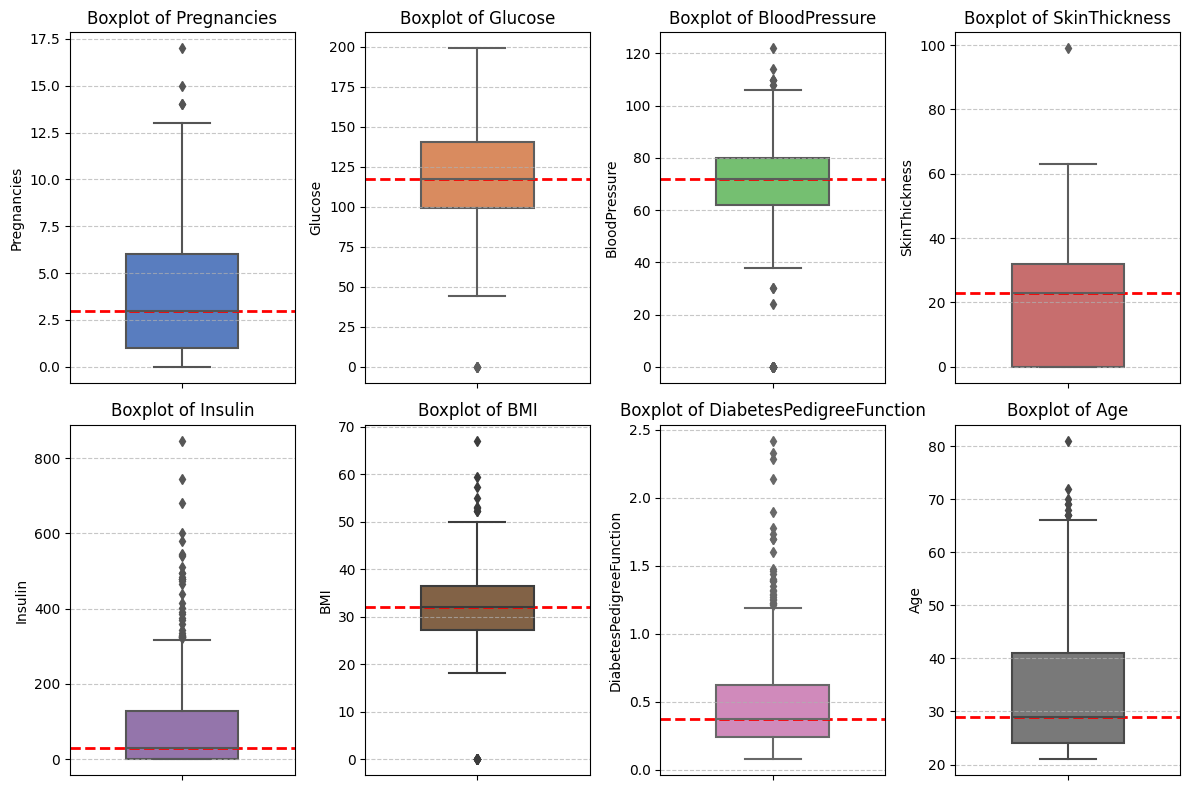

In [14]:
palette = sns.color_palette('muted')

plt.figure(figsize=(12, 8))
for i, column in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[column], color=palette[i-1], width=0.5)
    plt.axhline(y=df[column].median(), color='red', linestyle='--', linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [15]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")  # bir boşluk bırakmak için \n koyuyoruz

    if na_name:
        return na_columns


missing_values_table(df, True)


Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

In [17]:
##################################
# CORRELATION
##################################

# Correlation, in probability theory and statistics, indicates the direction and strength of the linear relationship between two random variables.

corr= df.corr()
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


In [18]:
corr_df= corr.unstack().sort_values(ascending=False)
corr_df= pd.DataFrame(corr_df)
corr_df

,,0
Pregnancies,Pregnancies,1.000
Glucose,Glucose,1.000
Age,Age,1.000
DiabetesPedigreeFunction,DiabetesPedigreeFunction,1.000
BMI,BMI,1.000
...,...,...
Insulin,Pregnancies,-0.074
Pregnancies,SkinThickness,-0.082
SkinThickness,Pregnancies,-0.082
Age,SkinThickness,-0.114


In [19]:
corr_df.reset_index(inplace=True)
corr_df.columns=["var1","var2","corr"]
corr_df

,var1,var2,corr
0,Pregnancies,Pregnancies,1.000
1,Glucose,Glucose,1.000
2,Age,Age,1.000
3,DiabetesPedigreeFunction,DiabetesPedigreeFunction,1.000
4,BMI,BMI,1.000
...,...,...,...
76,Insulin,Pregnancies,-0.074
77,Pregnancies,SkinThickness,-0.082
78,SkinThickness,Pregnancies,-0.082
79,Age,SkinThickness,-0.114


In [20]:
corr_df[(corr_df["var1"]=="Outcome") & (corr_df["corr"]!=1)]

,var1,var2,corr
12,Outcome,Glucose,0.467
20,Outcome,BMI,0.293
28,Outcome,Age,0.238
29,Outcome,Pregnancies,0.222
41,Outcome,DiabetesPedigreeFunction,0.174
52,Outcome,Insulin,0.131
57,Outcome,SkinThickness,0.075
59,Outcome,BloodPressure,0.065


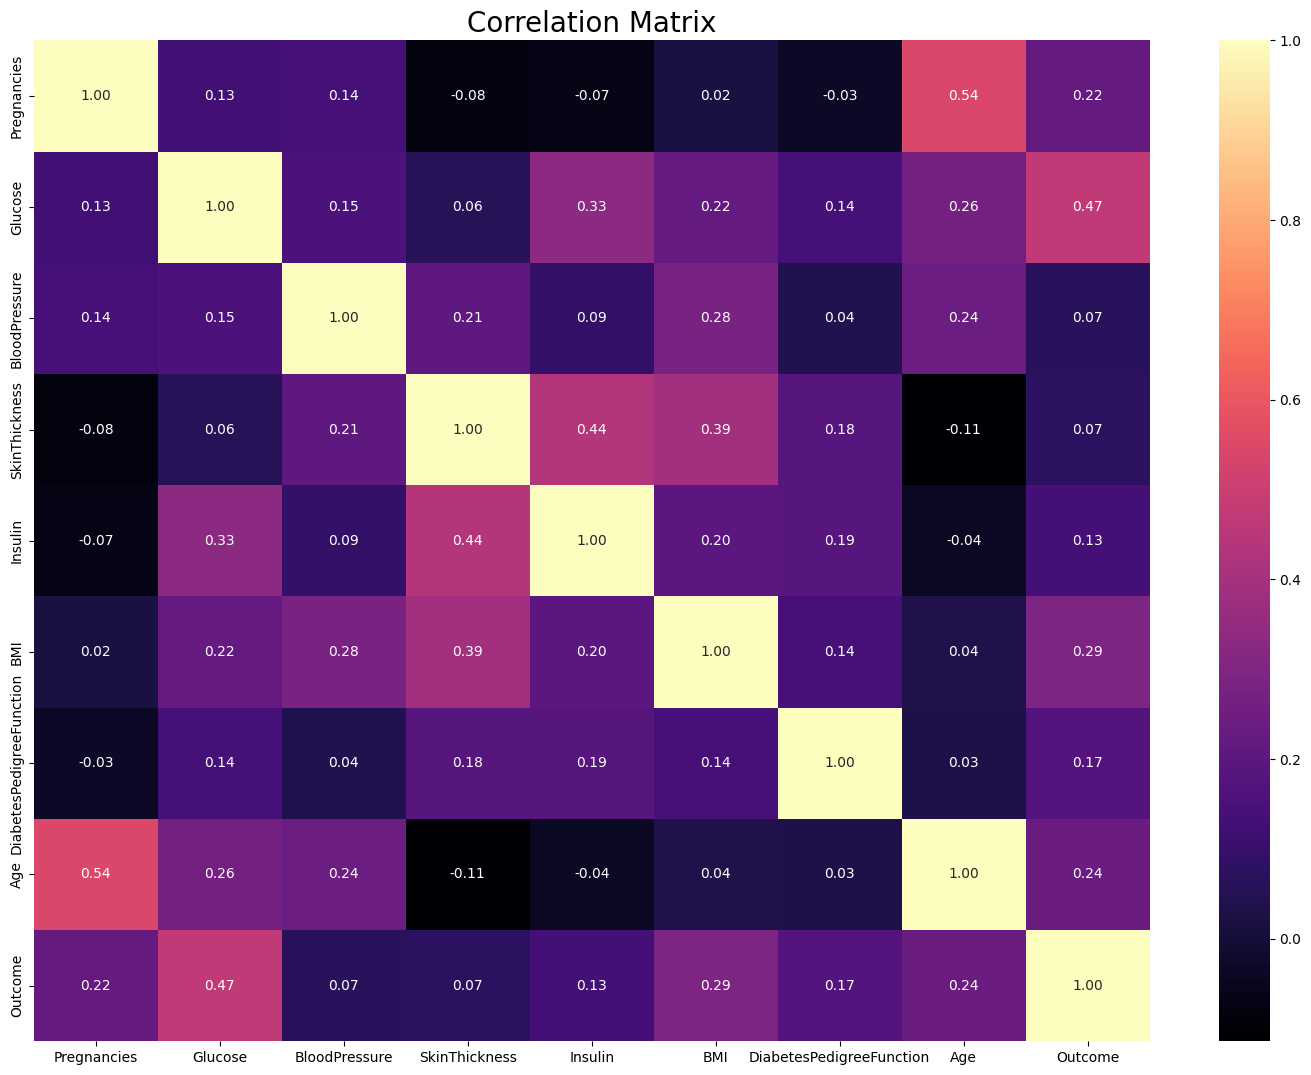

In [21]:
# Correlation Matrix

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show(block=True)

In [22]:
##################################
# BASE MODEL SETUP
##################################

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [23]:
rf_model_1 = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model_1.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")


Accuracy: 0.77
Recall: 0.706
Precision: 0.59
F1: 0.64
Auc: 0.75


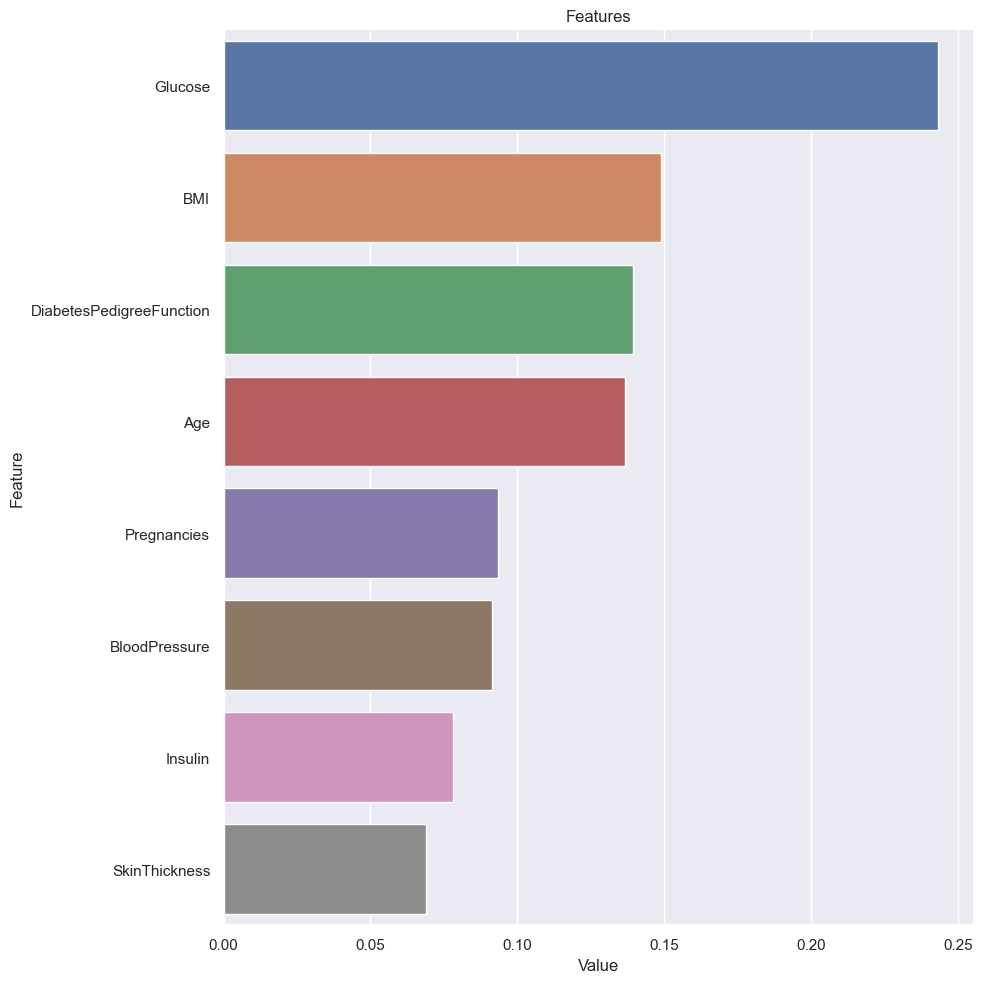

In [24]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model_1, X)

In [25]:
##################################
# MISSING VALUE ANALYSIS
##################################

selected=["Glucose","SkinThickness","Insulin","BMI","BloodPressure"]

for col in selected:
    df[col]= df[col].apply(lambda x: np.nan if x==0 else x)

In [26]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")  # bir boşluk bırakmak için \n koyuyoruz

    if na_name:
        return na_columns


missing_values_table(df, True)

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [28]:
df.groupby("Outcome")["Insulin"].mean()

Outcome
0   130.288
1   206.846
Name: Insulin, dtype: float64

In [29]:
 for col in selected:
    df[col]=df[col].fillna(df.groupby("Outcome")[col].transform("mean"))

In [30]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
### OUTLIER DETECTION

def outlier_thresholds(dataframe, col_name, q1=0.15, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# with these up and low values , we are gonna look at the variables if there is a outlier or not 
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age False


In [32]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


In [33]:
df.columns= [col.upper() for col in df.columns]
df.columns

Index(['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN',
       'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'OUTCOME'],
      dtype='object')

In [34]:
##################################
# FEATURE INFERENCE
##################################

df["AGE_NEW"]= pd.cut(df["AGE"],bins= [20,45,max(df["AGE"])], labels=["mature","senior"])

df["GLUCOSE_NEW"]= pd.cut(df["GLUCOSE"], bins=[0, 100, 140 , max(df["GLUCOSE"])], labels=["low","normal","high"])

df["BMI_NEW"]=pd.cut(df["BMI"], bins=[18,25,32,max(df["BMI"])], labels=["Normal Weight","Overweight","Obese"])

In [35]:
df.groupby("AGE_NEW")["OUTCOME"].mean()

AGE_NEW
mature   0.323
senior   0.492
Name: OUTCOME, dtype: float64

In [36]:
df.groupby("GLUCOSE_NEW")["OUTCOME"].mean()

GLUCOSE_NEW
low      0.086
normal   0.318
high     0.691
Name: OUTCOME, dtype: float64

In [37]:
df.loc[df["INSULIN"]<=130,"INSULIN_NEW"]="normal"
df.loc[df["INSULIN"]>130, "INSULIN_NEW"]="anormal"

In [38]:
df["GLUCOSE_INSULIN"]=df["GLUCOSE"]*df["INSULIN"]
df["INSULIN_BMI"]=df["INSULIN"]*df["BMI"]
df["GLUCOSE_BLOODPRESSURE"]= df["GLUCOSE"]* df["BLOODPRESSURE"]
df["INSULIN_BLOODPRESSURE"]= df["INSULIN"]*df["BLOODPRESSURE"]

In [39]:
# AGE-GLUCOSE
df.loc[(df["AGE_NEW"]=="mature") & (df["GLUCOSE_NEW"]=="low"),"AGE_GLUCOSE"]="maturelow"
df.loc[(df["AGE_NEW"]=="mature") & (df["GLUCOSE_NEW"]=="normal"),"AGE_GLUCOSE"]="maturenormal"
df.loc[(df["AGE_NEW"]=="mature") & (df["GLUCOSE_NEW"]=="high"),"AGE_GLUCOSE"]="maturehigh"

df.loc[(df["AGE_NEW"]=="senior") & (df["GLUCOSE_NEW"]=="low"),"AGE_GLUCOSE"]="seniorlow"
df.loc[(df["AGE_NEW"]=="senior") & (df["GLUCOSE_NEW"]=="normal"),"AGE_GLUCOSE"]="seniornormal"
df.loc[(df["AGE_NEW"]=="senior") & (df["GLUCOSE_NEW"]=="high"),"AGE_GLUCOSE"]="seniorhigh"

In [40]:
# AGE-BMI
df.loc[(df["AGE_NEW"]=="mature") & (df["BMI_NEW"]=="Normal Weight"),"AGE_BMI"]="matureNormalWeight"
df.loc[(df["AGE_NEW"]=="mature") & (df["BMI_NEW"]=="Overweight"),"AGE_BMI"]="matureOverweight"
df.loc[(df["AGE_NEW"]=="mature") & (df["BMI_NEW"]=="Obese"),"AGE_BMI"]="matureObese"

df.loc[(df["AGE_NEW"]=="senior") & (df["BMI_NEW"]=="Normal Weight"),"AGE_BMI"]="seniorNormalWeight"
df.loc[(df["AGE_NEW"]=="senior") & (df["BMI_NEW"]=="Overweight"),"AGE_BMI"]="seniorOverweight"
df.loc[(df["AGE_NEW"]=="senior") & (df["BMI_NEW"]=="Obese"),"AGE_BMI"]="seniorObese"

In [41]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,AGE_NEW,GLUCOSE_NEW,BMI_NEW,INSULIN_NEW,GLUCOSE_INSULIN,INSULIN_BMI,GLUCOSE_BLOODPRESSURE,INSULIN_BLOODPRESSURE,AGE_GLUCOSE,AGE_BMI
0,6.000,148.000,72.000,35.000,206.846,33.600,0.627,50,1,senior,high,Obese,anormal,30613.231,6950.031,10656.000,14892.923,seniorhigh,seniorObese
1,1.000,85.000,66.000,29.000,130.288,26.600,0.351,31,0,mature,low,Overweight,anormal,11074.470,3465.658,5610.000,8599.000,maturelow,matureOverweight
2,8.000,183.000,64.000,33.000,206.846,23.300,0.672,32,1,mature,high,Normal Weight,anormal,37852.846,4819.515,11712.000,13238.154,maturehigh,matureNormalWeight
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21,0,mature,low,Overweight,normal,8366.000,2641.400,5874.000,6204.000,maturelow,matureOverweight
4,0.000,137.000,40.000,35.000,168.000,43.100,1.603,33,1,mature,normal,Obese,anormal,23016.000,7240.800,5480.000,6720.000,maturenormal,matureObese


In [43]:
##################################
# ENCODING
##################################

cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols

Observations: 768
Variables: 19
cat_cols: 7
num_cols: 12
cat_but_car: 0
num_but_cat: 4


['INSULIN_NEW',
 'AGE_GLUCOSE',
 'AGE_BMI',
 'OUTCOME',
 'AGE_NEW',
 'GLUCOSE_NEW',
 'BMI_NEW']

In [44]:
cat_cols=[ col for col in cat_cols if col != "OUTCOME"]

In [45]:
# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df,col)

In [46]:
# One-Hot Encoding 
# cat_cols list update

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cat_cols = [col for col in cat_cols if col not in binary_cols]

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [48]:
##################################
# STANDARDISATION
##################################

# minmaxscaling, standartscaling 
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

df[num_cols].head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,GLUCOSE_INSULIN,INSULIN_BMI,GLUCOSE_BLOODPRESSURE,INSULIN_BLOODPRESSURE
0,0.600,0.752,0.000,0.875,0.897,0.170,0.665,1.235,1.026,0.780,0.523,0.741
1,-0.400,-0.776,-0.375,0.125,0.000,-0.599,-0.056,0.118,-0.361,-0.275,-0.647,-0.193
2,1.000,1.600,-0.500,0.625,0.897,-0.962,0.783,0.176,1.540,0.135,0.768,0.495
3,-0.400,-0.679,-0.375,-0.625,-0.425,-0.434,-0.537,-0.471,-0.553,-0.525,-0.586,-0.549
4,-0.600,0.485,-2.000,0.875,0.442,1.214,3.218,0.235,0.487,0.869,-0.677,-0.472


In [49]:
##################################
# MODELLING
##################################

y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.87
Recall: 0.84
Precision: 0.78
F1: 0.81
Auc: 0.86


In [50]:
from lightgbm import LGBMClassifier

lgbm_model= LGBMClassifier(random_state=42, verbosity=-1)
lgbm_model.fit(X_train, y_train)
y_pred_2 =lgbm_model.predict(X_test)
lgbm_accuracy= accuracy_score(y_pred_2, y_test) 
lgbm_accuracy

0.8744588744588745

In [51]:
from sklearn.tree import DecisionTreeClassifier

des_model = DecisionTreeClassifier(random_state=42)
des_model.fit(X_train, y_train)
y_pred_2 = des_model.predict(X_test)
decison_sonuc = accuracy_score(y_pred_2, y_test)
decison_sonuc

0.8225108225108225

In [52]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_3 = log_model.predict(X_test)
logistic_sonuc = accuracy_score(y_pred_3, y_test)
logistic_sonuc

0.7792207792207793

In [53]:
from xgboost import XGBClassifier

xgm_model= XGBClassifier(random_state=42)
xgm_model.fit(X_train, y_train)
y_pred_4 =xgm_model.predict(X_test)
xgb= accuracy_score(y_pred_4, y_test)  
xgb

0.8744588744588745

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn_model= KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_6 =knn_model.predict(X_test)
knn= accuracy_score(y_pred_6, y_test) # 0.84
knn

0.8354978354978355

In [55]:
models= [rf_model,lgbm_model,des_model,log_model,xgm_model,knn_model]

best_model = None
best_accuracy = 0

for i, model in enumerate(models,1):
    model.fit(X_train, y_train)
    y_pred_i= model.predict(X_test)
    accuracy_score_model=accuracy_score(y_pred_i, y_test)
    
    print(f'Model Name: {type(model).__name__}, Accuracy: {accuracy_score_model}\n')
    
    print("#"*80)
    
    if accuracy_score_model> best_accuracy:
        best_accuracy=accuracy_score_model
        best_model = model
        
print(f"Best Model {best_model}, Best Accuracy {best_accuracy}")

Model Name: RandomForestClassifier, Accuracy: 0.8701298701298701

################################################################################
Model Name: LGBMClassifier, Accuracy: 0.8744588744588745

################################################################################
Model Name: DecisionTreeClassifier, Accuracy: 0.8225108225108225

################################################################################
Model Name: LogisticRegression, Accuracy: 0.7792207792207793

################################################################################
Model Name: XGBClassifier, Accuracy: 0.8744588744588745

################################################################################
Model Name: KNeighborsClassifier, Accuracy: 0.8354978354978355

################################################################################
Best Model LGBMClassifier(random_state=42, verbosity=-1), Best Accuracy 0.8744588744588745


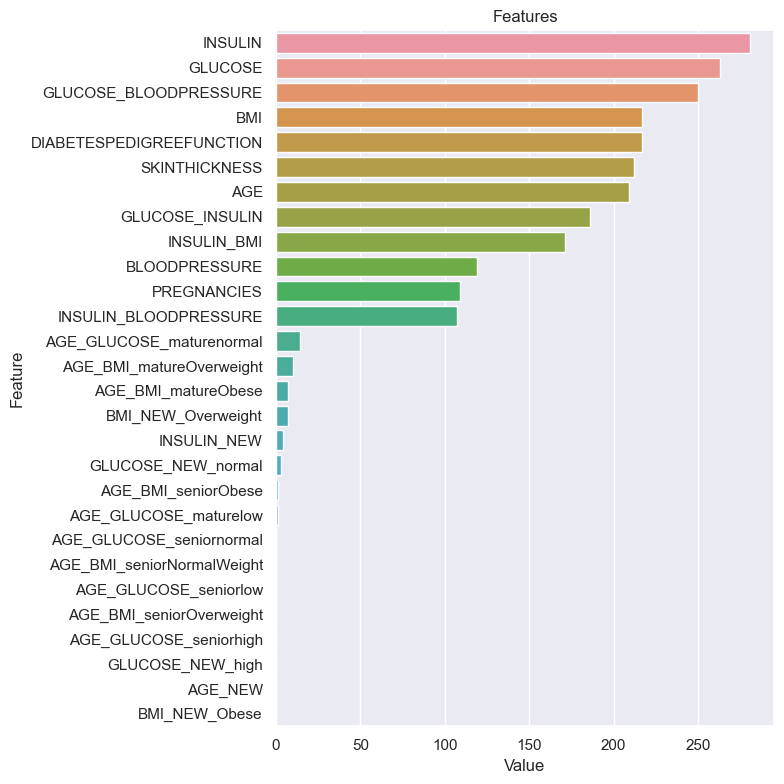

In [56]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(lgbm_model, X_train)